In [81]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import os

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 18

mpl.rcParams['font.family'] = 'serif'

### Task 1

In [3]:
# Load count rate date from txt using pandas
cr_no_light = pd.read_csv('data/no_light_count_rate.txt', sep='\t', skiprows=18)
cr650 = pd.read_csv('data/650nm_count_rate.txt', sep='\t', skiprows=18)
cr1310 = pd.read_csv('data/1310nm_count_rate.txt', sep='\t', skiprows=18)
cr1550 = pd.read_csv('data/1550nm_count_rate.txt', sep='\t', skiprows=18)
 
# Only keep columns "BV5" and "C5" and "BC"
cr650 = cr650[["BV5", "C5", "BC"]]
cr1310 = cr1310[["BV5", "C5", "BC"]]
cr1550 = cr1550[["BV5", "C5", "BC"]]
cr_no_light = cr_no_light[["BV5", "C5", "BC"]]

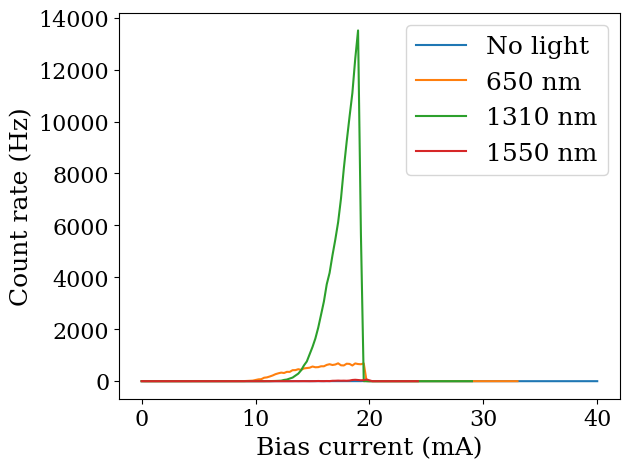

In [4]:
# plot C5 as function of BC
plt.plot(cr_no_light["BC"], cr_no_light["C5"], label="No light")
plt.plot(cr650["BC"], cr650["C5"], label="650 nm")
plt.plot(cr1310["BC"], cr1310["C5"], label="1310 nm")
plt.plot(cr1550["BC"], cr1550["C5"], label="1550 nm")
plt.xlabel("Bias current (mA)")
plt.ylabel("Count rate (Hz)")
plt.legend()
plt.tight_layout()

plt.show()

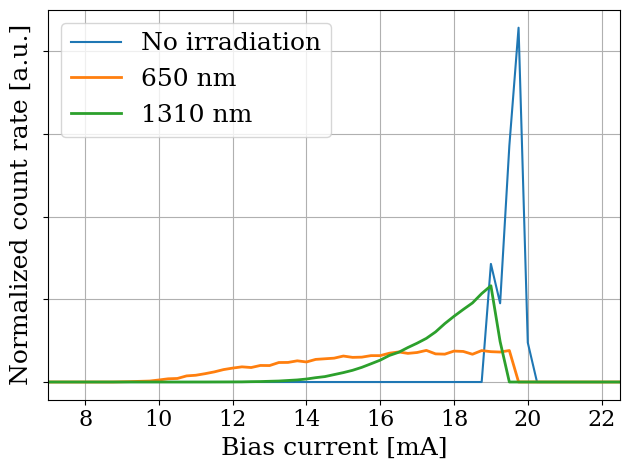

In [21]:
# Normalize counts by sum of counts
counts_650 = cr650["C5"].sum()
cr650["C5_norm"] = cr650["C5"] / counts_650
counts_1310 = cr1310["C5"].sum()
cr1310["C5_norm"] = cr1310["C5"] / counts_1310
counts_1550 = cr1550["C5"].sum()
cr1550["C5_norm"] = cr1550["C5"] / counts_1550
counts_no_light = cr_no_light["C5"].sum()
cr_no_light["C5_norm"] = cr_no_light["C5"] / counts_no_light

# Plot normalized count rate
plt.plot(cr_no_light["BC"], cr_no_light["C5_norm"], label="No irradiation")
plt.plot(cr650["BC"], cr650["C5_norm"], label="650 nm", linewidth=2)
plt.plot(cr1310["BC"], cr1310["C5_norm"], label="1310 nm", linewidth=2)
#plt.plot(cr1550["BC"], cr1550["C5_norm"], label="1550 nm")
plt.xlabel("Bias current [mA]")
plt.ylabel("Normalized count rate [a.u.]")
plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.tight_layout()
plt.xlim(7, 22.5)
plt.grid()
plt.show()

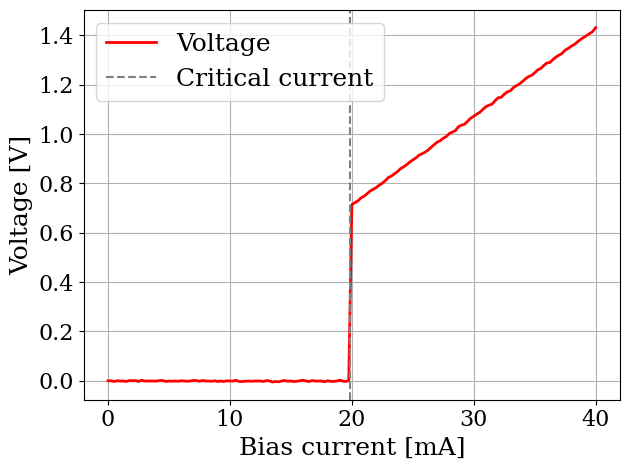

In [16]:
I_c = (20 + 19.75)/2

# Plot BV5 as function of BC for no_light case
plt.plot(cr_no_light["BC"], cr_no_light["BV5"], label="Voltage", linewidth=2, color = 'red')
plt.xlabel("Bias current [mA]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.axvline(x=I_c, color='grey', linestyle='--', label="Critical current")
plt.legend()
plt.show()

### Task 2

In [10]:
power_file_names = ["5-04", "5-32", "5-63", "5-97", "6-32", "6-71", "7-13"]
power_levels_dBm = np.array([-5.04, -5.32, -5.63, -5.97, -6.32, -6.71, -7.13])
power_levels_mW = 10**(power_levels_dBm/10)

count_data = pd.DataFrame(columns=["power_dBm", "power_mW", "mean", "std"])
for i, filename in enumerate(power_file_names):
    count_data_file = pd.read_csv('data/' + filename + 'dBm.txt', sep='\t', skiprows=9)
    count_data_file = count_data_file[["C4"]]

    mean = float(count_data_file.mean())
    std = float(count_data_file.std())
    count_data.loc[i] = [power_levels_dBm[i], power_levels_mW[i], mean, std]

count_data

,power_dBm,power_mW,mean,std
0,-5.04,0.313329,23866.967742,2002.987344
1,-5.32,0.293765,23403.333333,1871.652417
2,-5.63,0.273527,21235.741935,1599.264393
3,-5.97,0.252930,18715.000000,1458.757022
4,-6.32,0.233346,16879.943396,1338.890505
5,-6.71,0.213304,13742.478261,1113.503230
6,-7.13,0.193642,13146.096774,1100.996317


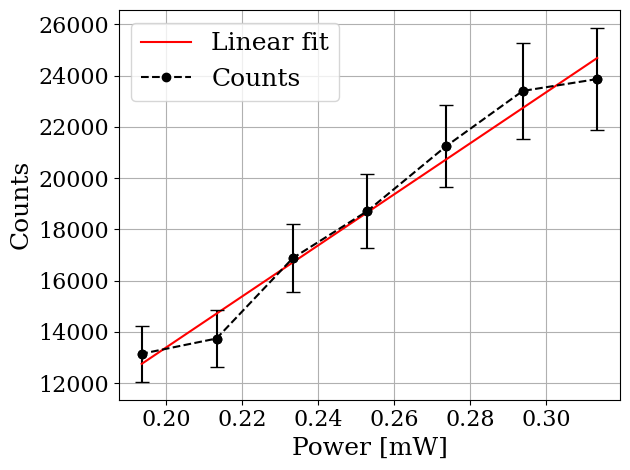

'\n# same plot but with dbm\nplt.plot(count_data["power_dBm"], count_data["mean"], label="Mean", linestyle=\'--\', marker=\'o\')\nplt.xlabel("Power (dBm)")\nplt.ylabel("Counts")\nplt.legend()\nplt.tight_layout()\nplt.grid()\nplt.show()\n'

In [48]:
# Do a linear fit
def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, count_data["power_mW"], count_data["mean"])

# Plot mean and std as function of power
plt.plot(count_data["power_mW"], linear(count_data["power_mW"], *popt), label="Linear fit", color = "r")
plt.plot(count_data["power_mW"], count_data["mean"], label="Counts", linestyle='--', marker='o', color = "k")
plt.errorbar(count_data["power_mW"], count_data["mean"], yerr=count_data["std"], fmt='o', color = "k", capsize=5)
plt.xlabel("Power [mW]")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

"""
# same plot but with dbm
plt.plot(count_data["power_dBm"], count_data["mean"], label="Mean", linestyle='--', marker='o')
plt.xlabel("Power (dBm)")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()
"""

### Task 3

0.45000002 9.399998


(-2.0, 15.0)

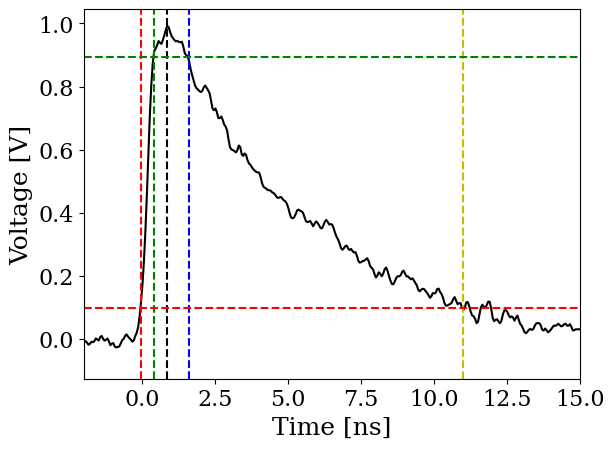

In [63]:
channel = 4

filenames = os.listdir(f"data/detection_events_ch{channel}")
path = f"data/detection_events_ch{channel}/C1--C--00055.txt"
data = pd.read_csv(path, sep=',', skiprows=4)
data["Time"] = data["Time"]*1e9

max_voltage = data["Ampl"].max()
lower_limit = 0.1*max_voltage
upper_limit = 0.9*max_voltage

time_at_max_voltage = data[data["Ampl"] == max_voltage]["Time"].iloc[0]

t1 = data[data["Ampl"] > lower_limit]["Time"].iloc[0]
t2 = data[data["Ampl"] > upper_limit]["Time"].iloc[0]
t3 = data[(data["Ampl"] < upper_limit) & (data["Time"] > time_at_max_voltage)]["Time"].iloc[0]
t4 = data[(data["Ampl"] < lower_limit) & (data["Time"] > time_at_max_voltage)]["Time"].iloc[0]

t_rise = t2 - t1
t_decay = t4 - t3

print(t_rise, t_decay)

plt.plot(data["Time"], data["Ampl"], label="Channel 1", color = "k")
plt.axvline(x=t1, color='r', linestyle='--', label="Lower limit")
plt.axvline(x=t2, color='g', linestyle='--', label="Upper limit")
plt.axvline(x=t3, color='b', linestyle='--', label="Lower limit last")
plt.axvline(x=t4, color='y', linestyle='--', label="Upper limit last")
plt.axvline(x=time_at_max_voltage, color='k', linestyle='--', label="Time at max voltage")
plt.axhline(y=lower_limit, color='r', linestyle='--')
plt.axhline(y=upper_limit, color='g', linestyle='--')
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [V]")
plt.xlim(-2, 15)


In [65]:
channel = 4

filenames = os.listdir(f"data/detection_events_ch{channel}")

times = pd.DataFrame(columns=["rise_time", "decay_time"])

for filename in filenames:
    path = f"data/detection_events_ch{channel}/" + filename
    curr_event = pd.read_csv(path, sep=',', skiprows=4)
    curr_event["Time"] = curr_event["Time"]*10**9
    max_voltage = curr_event["Ampl"].max()
    lower_limit = 0.1*max_voltage
    upper_limit = 0.9*max_voltage

    t1 = curr_event[curr_event["Ampl"] > lower_limit]["Time"].iloc[0]
    t2 = curr_event[curr_event["Ampl"] > upper_limit]["Time"].iloc[0]
    t3 = curr_event[(curr_event["Ampl"] < upper_limit) & (curr_event["Time"] > time_at_max_voltage)]["Time"].iloc[0]
    t4 = curr_event[(curr_event["Ampl"] < lower_limit) & (curr_event["Time"] > time_at_max_voltage)]["Time"].iloc[0]

    t_rise = t2 - t1
    t_decay = t4 - t3

    times.loc[len(times)] = [t_rise, t_decay]

9.406404706611571 0.35621725482501104


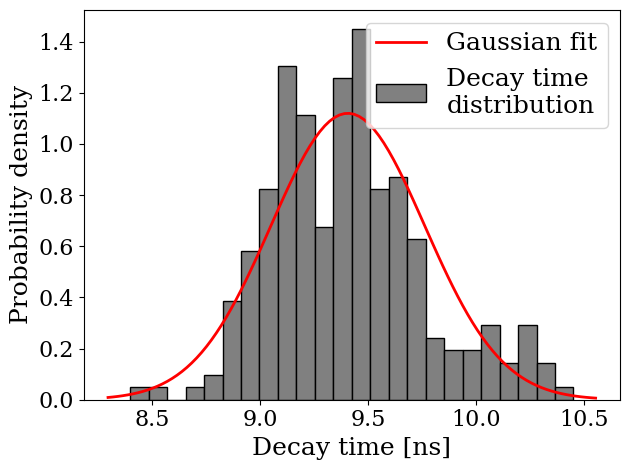

In [113]:
# Fit a normal distribution to the data:
mu, std = norm.fit(times["decay_time"])

# Plot the histogram with gaussian fit
plt.hist(times["decay_time"], bins=24, density=True, color='grey', edgecolor= "k", label="Decay time\ndistribution")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label="Gaussian fit")

plt.xlabel("Decay time [ns]")
plt.ylabel("Probability density")
plt.legend()
plt.tight_layout()


print(mu, std)

0.43884297304694225 0.03520166218956846


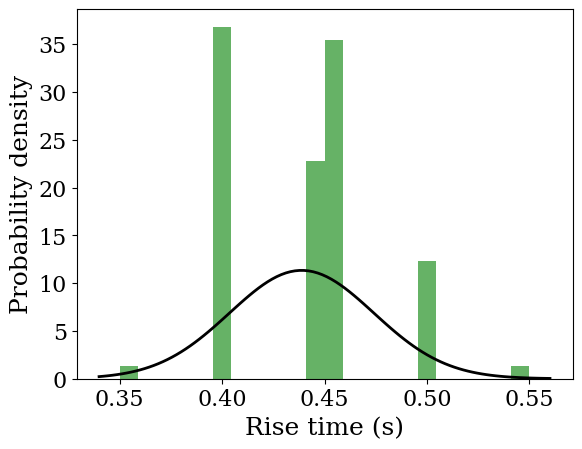

In [85]:
# Fit a normal distribution to the data:
mu, std = norm.fit(times["rise_time"])

# Plot the histogram with gaussian fit
bin_edges = np.array([0.35, ])
plt.hist(times["rise_time"], bins=22, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Rise time (s)")
plt.ylabel("Probability density")


print(mu, std)